In [1]:
%matplotlib inline
import numpy as np
from astropy.io import fits as pf
import matplotlib.pyplot as plt

In [3]:
#open the candidate file

dfile = 'QSO_Candidates_Final_Clustering_Set.fits'

data = pf.open(dfile)[1].data



In [68]:
#Separate the 7 colors into arrays

u = data['ug'] + data ['gr'] + data['ri'] + data['imag']
g = data ['gr'] + data['ri'] + data['imag']
r = data['ri'] + data['imag']
i = data['imag']
z = data['imag'] - data['iz']
s1= data['imag'] - (data['zs1'] + data['iz'])
s2= data['imag'] - (data['s1s2'] + data['zs1'] + data['iz'])

fu = data['PSFFLUX'][:,0]
fg = data['PSFFLUX'][:,1]
fr = data['PSFFLUX'][:,2]
fi = data['PSFFLUX'][:,3]
fz = data['PSFFLUX'][:,4]
fs1= data['CH'][:,0]
fs2= data['CH'][:,1]

print len(fu)

9076


In [69]:
u = u[:, np.newaxis]
g = g[:, np.newaxis]
r = r[:, np.newaxis]
i = i[:, np.newaxis]
z = z[:, np.newaxis]
s1= s1[:, np.newaxis]
s2= s2[:, np.newaxis]

fu = fu[:, np.newaxis]
fg = fg[:, np.newaxis]
fr = fr[:, np.newaxis]
fi = fi[:, np.newaxis]
fz = fz[:, np.newaxis]
fs1= fs1[:, np.newaxis]
fs2= fs2[:, np.newaxis]

In [70]:
colarray = np.hstack([u,g,r,i,z,s1,s2])
flxarray = np.hstack([fu,fg,fr,fi,fz,fs1,fs2])

In [40]:
bandpass = [3543, 4770, 6231, 7625, 9134, 36000, 45000]


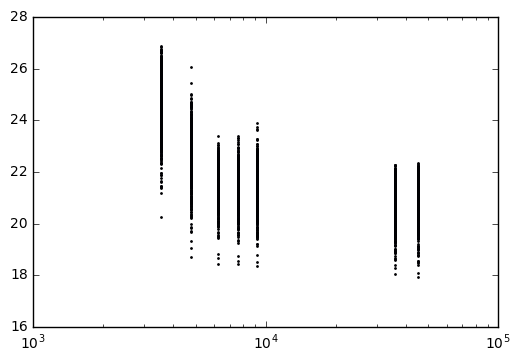

In [62]:
plt.figure(1)
for i in range(1000):
    plt.scatter(bandpass, colarray[i],s=1)

plt.xscale('log')
plt.show()



In [73]:
bdx = (data['Vis_insp'] == 0)

galaxies = colarray[bdx]
galflux = flxarray[bdx]

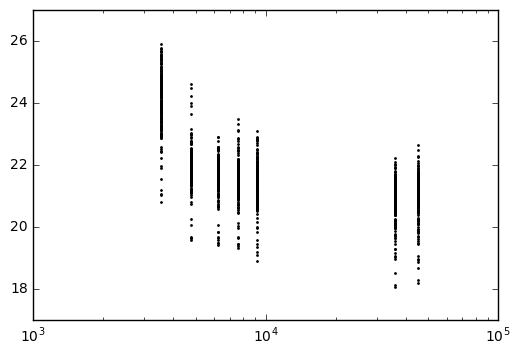

In [57]:
plt.figure(2)
for i in range(len(galaxies)):
    plt.scatter(bandpass, galaxies[i],s=1)

plt.xscale('log')
plt.show()


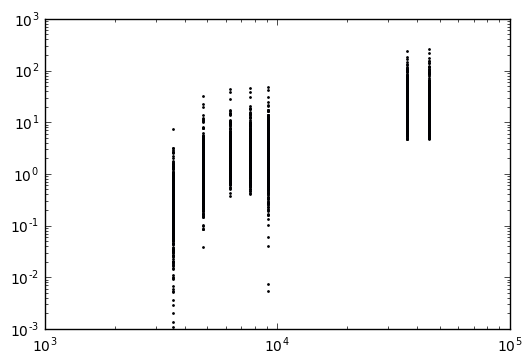

In [71]:
plt.figure(3)
for i in range(1000):
    plt.scatter(bandpass, flxarray[i],s=1)

plt.xscale('log')
plt.yscale('log')
plt.show()

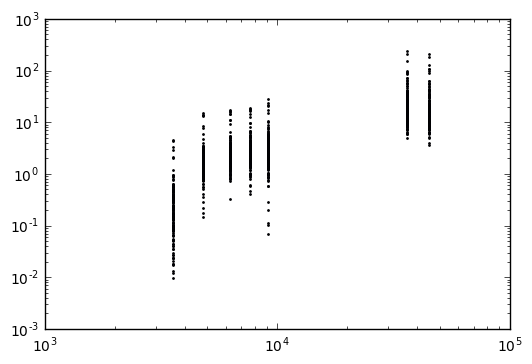

In [74]:
plt.figure(4)
for i in range(len(galflux)):
    plt.scatter(bandpass, galflux[i],s=1)

plt.xscale('log')
plt.yscale('log')
plt.show()